# Praktikum 4 - Text Classification
Referensi dari [pycon-2016-tutorial](https://github.com/justmarkham/pycon-2016-tutorial/). Text Classification merupakan bagian dari Natural Language Processing (NLP). Text Classification artinya melakukan klasifikasi suatu text pada label/class yang sesuai.
## Agenda
1. Model building in scikit-learn
2. Representing text as Numerical data
3. Reading a text-based dataset into pandas
4. Vectorizing our dataset
5. Building and evaluating a model
6. Comparing models (Naive Bayes and Logistic Regression)

## Part 1: Model building in scikit-learn
<b>scikit-learn</b> merupakan  tools pada machine learning python untuk melakukan data mining atau data analysis. Berikut ini adalah contoh penggunaan <b>scikit-learn</b> pada dataset [iris](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/).

In [1]:
# Load dataset iris
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
# Mendefinisikan matriks fitur (X) dan response vector (y)
X = iris.data
y = iris.target

<b>"Fitur"</b> dikenal juga sebagai predictors, inputs, attributes. <b>"Response"</b> dikenal sebagai target, label, output.

In [3]:
# melakukan check shapes dari X dan y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


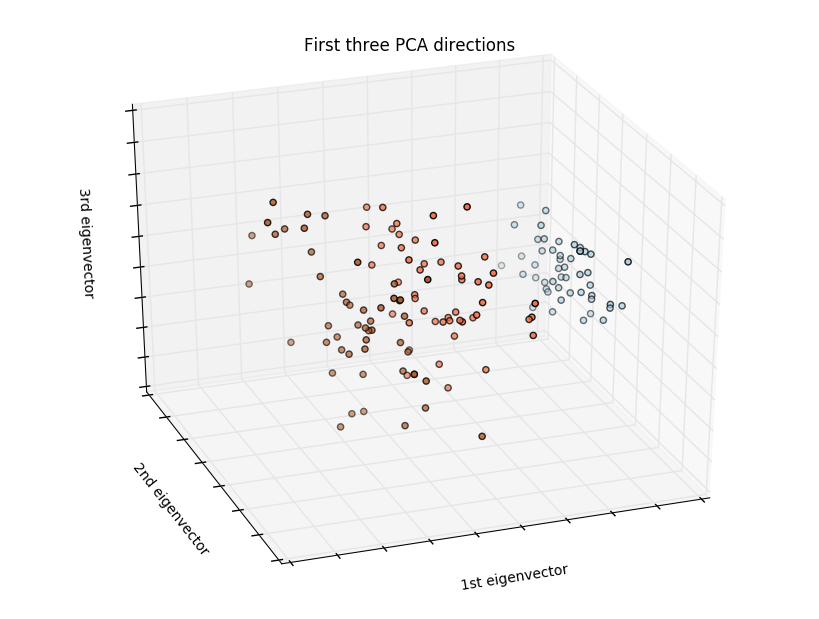

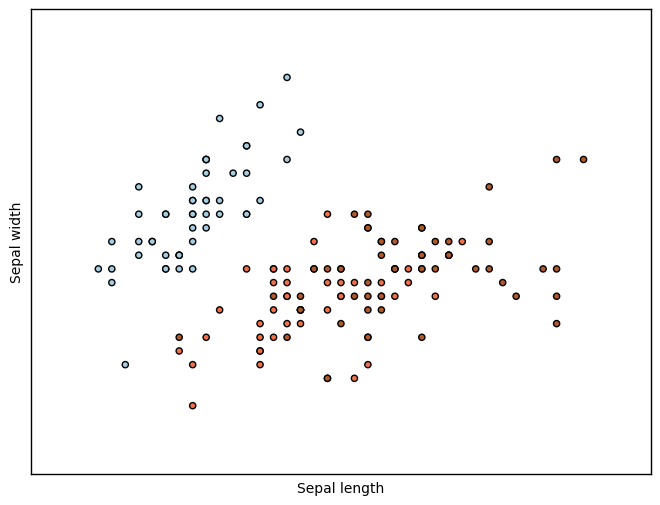

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

<b>"Observations"</b> dikenal juga sebagai samples, instances, records. 
<br><br>
Dalam melakukan hal tersebut, pada python terdapat library Python Data Analysis yang dikenal [pandas](http://pandas.pydata.org/) berguna untuk melakukan analisis data. Berikut adalah contoh penggunaan <b>pandas</b> untuk mengamati dataset iris.

In [4]:
# mengamati 5 baris pertama matriks fitur (termasuk nama fitur)
import pandas as pd
pd.DataFrame(X, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# mengamati response vector
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Perlu diperhatikan, dalam membuat sebuah <b>model</b>, fitur harus dalam bentuk <b>numeric</b>, dan setiap melakukan <b>observations</b> harus memiliki <b> fitur yang sama pada urutan yang sama</b>.

In [6]:
# import the class
from sklearn.neighbors import KNeighborsClassifier

# inisialisasi model knn
knn = KNeighborsClassifier()

# fit the model, dengan X sebagai training data dan y sebagai target
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Untuk membuat <b>prediction</b>, inputs/observations haruslah memiliki <b>fitur yang sama dengan data training</b>. 

In [7]:
# prediksi dengan input baru
knn.predict([[3, 5, 4, 2]])

array([1])

In [8]:
# score akurasi
knn.score(X, y)

0.96666666666666667

## Part 2: Representing text as numerical data
Pada bagian ini, akan merubah text menjadi data <b>numeric</b>, karena dalam membuat sebuah model harus dalam tipe numeric.

In [9]:
# contoh text pada training model (SMS messages)
simple_train = ['call you tonight', 'Call me a cab', 'please call me.. PLEASE!']

From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect **numerical feature vectors with a fixed size** rather than the **raw text documents with variable length**.

Kita akan menggunakan [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) untuk "melakukan convert text ke dalam matriks jumlah token":

In [10]:
# import dan inisialisasi CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [11]:
# menentukan 'vocabulary' dari data training
vect.fit(simple_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [12]:
# memeriksa vocabulary yang sesuai
vect.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [13]:
# mengubah data training ke dalam 'document-term matrix'
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [14]:
# mengubah sparse matriks menjadi dense matriks
arr_dtm = simple_train_dtm.toarray()
arr_dtm

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [15]:
# memeriksa vocabulary dan document-term matrix bersamaan
pd.DataFrame(arr_dtm, columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> In this scheme, features and samples are defined as follows:

> - Each individual token occurrence frequency (normalized or not) is treated as a **feature**.
> - The vector of all the token frequencies for a given document is considered a multivariate **sample**.

> A **corpus of documents** can thus be represented by a matrix with **one row per document** and **one column per token** (e.g. word) occurring in the corpus.

> We call **vectorization** the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the **Bag of Words** or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

In [16]:
# mengecek tipe data document-term matrix
type(simple_train_dtm)

scipy.sparse.csr.csr_matrix

In [17]:
# memeriksa sparse matrix
print(simple_train_dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> As most documents will typically use a very small subset of the words used in the corpus, the resulting matrix will have **many feature values that are zeros** (typically more than 99% of them).

> For instance, a collection of 10,000 short text documents (such as emails) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 100 to 1000 unique words individually.

> In order to be able to **store such a matrix in memory** but also to **speed up operations**, implementations will typically use a **sparse representation** such as the implementations available in the `scipy.sparse` package.

In [18]:
# contoh text untuk model testing
simple_test = ["please don't call me"]

Untuk membuat <b>prediction</b>, inputs/observations haruslah memiliki <b>fitur yang sama dengan data training</b>. 

In [19]:
# mengubah data test menjadi document-term matrix
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]], dtype=int64)

In [20]:
# memeriksa vocabulary dan document-term matrix
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


**Kesimpulan:**
- vect.fit(train) **menentukan vocabulary** dari data training.
- vect.transform(train) menggunakan **fitted vocabulary** untuk membuat document-term matrix dari data training.
- vect.transform(test) menggunakan **fitted vocabulary** untuk membuat document-term matrix dari data test.

## Part 3: Reading a text-based dataset into pandas
Pada bagian ini, menggunakan dataset sms.tsv yang berisi data SMS berikut dengan labelnya berupa SPAM atau HAM. 

In [21]:
# read file ke dalam pandas menggunakan path
path = 'data/sms.tsv'
sms = pd.read_table(path, header=None, names=['label', 'message'])

In [22]:
# memerika bentuk data sms.tsv
sms.shape

(5572, 2)

In [23]:
# memeriksa 10 baris pertama data sms.tsv
sms.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [24]:
# memerika distribusi kelas
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [25]:
# mengubah label menjadi nilai numerik, ham = 0 dan spam = 1
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})

In [26]:
# mengecek apakah perubahan label berhasil
sms.head(10)

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [27]:
# mendefinisikan X dan y (dari data SMS) menggunakan COUNTVECTORIZER
X = sms.message
y = sms.label_num
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [34]:
# split X dan y menjadi dataset training dan testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


## Part 4: Vectorizing our dataset

In [29]:
# inisialisasi vector
vect = CountVectorizer()

In [30]:
# menentukan vocabulary pada data training, kemudian dibentuk menjadi document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [31]:
# atau bisa juga mengkombinasikan fit dan transform dalam satu langkah
X_train_dtm = vect.fit_transform(X_train)

In [32]:
# memeriksa document-term matrix
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [33]:
# mengubah data testing (menggunakan vocabulary) menjadi document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

## Part 5: Building and evaluating a model

Kita akan menggunakan [multinomial Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html):

> The multinomial Naive Bayes classifier is suitable for classification with **discrete features** (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [35]:
# import dan inisialisasi model Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [36]:
# lakukan train model menggunakan X_train_dtm
nb.fit(X_train_dtm, y_train)

# untuk mengetahui waktu training
%time nb.fit(X_train_dtm, y_train)

Wall time: 4 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
# membuat kelas prediksi untuk X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [52]:
# menghitung akurasi dari kelas prediksi
from sklearn import metrics
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
print(metrics.accuracy_score(y_true, y_pred))

print(metrics.accuracy_score(y_test, y_pred_class))

0.5
0.988513998564


In [45]:
# mencetak confusion matrix
print(metrics.confusion_matrix(y_true, y_pred))

print()
print(metrics.confusion_matrix(y_test, y_pred_class))

[[1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]]

[[1203    5]
 [  11  174]]


In [47]:
# mencetak pesan untuk false positives (ham terklasifikasi sebagai spam)
X_test[y_test < y_pred_class]

574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object

In [48]:
# mencetak pesan untuk false negatives (spam terklasifikasi sebagai ham)
X_test[y_test > y_pred_class]

3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

In [49]:
# contoh false negative
X_test[3132]

"LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323."

In [50]:
# menghitung predicted probabilities untuk X_test_dtm
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([  2.87744864e-03,   1.83488846e-05,   2.07301295e-03, ...,
         1.09026171e-06,   1.00000000e+00,   3.98279868e-09])

In [54]:
# menghitung Area Under the Curve (AUC)
import numpy as np
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
print(metrics.roc_auc_score(y_true, y_scores))

print(metrics.roc_auc_score(y_test, y_pred_prob))

0.75
0.986643100054


## Part 6: Comparing models (Naive Bayes and Logistic Regression)

We will compare multinomial Naive Bayes with [logistic regression](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression):

> Logistic regression, despite its name, is a **linear model for classification** rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

In [55]:
# import dan inisialisasi mode logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [57]:
# train model dengan X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

Wall time: 646 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
# membuat class prediction untuk X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [59]:
# menghitung predicted probabilities untuk X_test_dtm
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([ 0.01269556,  0.00347183,  0.00616517, ...,  0.03354907,
        0.99725053,  0.00157706])

In [60]:
# menghitung accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.9877961234745154

In [61]:
# menghitung AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.99368176123143015